# Lecture 28

## Sum of a random number of random variables; Inequalities (Cauchy-Schwarz, Jensen, Markov, Chebyshev)
----

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
%matplotlib inline  

plt.xkcd()

## Sum of Random Number of Random Variables

Let's say there's a store. At this store, there is a random number of customers. Each customer chooses to spend a random amount of money at the store. What can we say about the expected total amount spent at the store? What about its variance?

* $N$ is the number of customers (maybe Poisson? it doesn't matter at this point)
* $X_j$ be the amount customer $j$ spends
* $X_j$ has mean $\mu$ and variance $\sigma^2$
* assume that $N, \, X_1, \, N_2, \dots$ are independent

Find the mean and variance of $X = \sum_{j=1}^{N} X_j$.

Be careful, because $N$ is itself a random variable, and so we are summing up a _random number of random variables_. At this point, $N$ could be any distribution, perhaps Poisson, but we can put that question aside for now. Let's see if we can find some statistics about $X$ in terms of random variable $N$.

### $\mathbb{E}(X)$

Now, if we blindly tried to apply linearity, we might have:

\begin{align}
  \mathbb{E}(X) &=? \, N \, \mu &\quad \text{... no, this cannot be right}
\end{align}

But this is a category error, since the right-hand side of that equation is a _value_, while the left-hand side is a _random variable_. However, it does give us a clue: all we need to do is find a way to treat $N$ with a _value_, which we can do by thinking conditionally.

There are two ways we can use to find $\mathbb{E}(X)$:

\begin{align}
  &\text{...conditioning on } N \text{, the long way} \\
  \mathbb{E}(X) &= \sum_{n=0}^{\infty} \mathbb{E}(X|N=n) \, P(N=n) &\quad \text{conditioning on }N \\
  &= \sum_{n=0}^{\infty} \mu \, n \, P(N=n) &\quad \text{by linearity, independence} \\
  &= \mu \, \sum_{n=0}^{\infty} n \, P(N=n) &\quad \text{but by definition of }\mathbb{E} \\
  &= \boxed{\mu \, \mathbb{E}(N)} \\\\
  \\
  & \text{... or using Adam's Law} \\
  \mathbb{E}(X) &= \mathbb{E}\left( \mathbb{E}(X|N) \right) &\quad \text{Adam's Law} \\
  &= \mathbb{E}(\mu \, N) &\quad \text{treating } N \text{ as constant, and by linearity} \\
  &= \boxed{\mu \, \mathbb{E}(N)} 
\end{align}

Note that unlike the 2-envelope paradox covered in lectures 25 and 26, we _can_ forget about the condition $N=n$ _because of the independence of $X_j$_. That fact allows us to use linearity in the second step of finding $\mathbb{E}(X)$ the long way by conditioning on $N$. 

### $Var(X)$

Here, we will just apply EVvE's Law:

\begin{align}
  Var(X) &= \mathbb{E}\left( Var(X|N) \right) + Var\left( \mathbb{E}(X|N) \right) \quad \text{and working on each part} \\\\
  \mathbb{E}\left( Var(X|N) \right) &= \mathbb{E}(N \sigma^2) \quad \text{treating } N \text{ as fixed, independence} \\
  &= \sigma^2 \, \mathbb{E}(N) \\
  \\
  Var\left( \mathbb{E}(X|N) \right) &= Var(\mu \, N) \quad \text{} \\
  &= \mu^2 \, Var(N) \\\\
  \Rightarrow Var(X) &= \boxed{ \sigma^2 \, \mathbb{E}(N) + \mu^2 \, Var(N) }
\end{align}

Idiot-checking that result, we confirm that

* $\mathbb{E}(X) = \mu \, \mathbb{E}(N)$ means that the average total sales is the average per-customer spending amount times the average number of customers
* $\sigma^2$ is in terms of money-squared; $\mu$ is in terms of money, so $Var(X)$ is in terms of money-squared
* both $\mathbb{E}(N)$ and $Var(N)$ are dimensionless values ("people" are not units in this case)
* if we knew the MGF of each $X_j$, then we could condition on $N$ to treat it as fixed in order to get the MGF of $X$ (multiply by $n$)

## Statistical Inequality

In the field of law, it is a lot easier to stand in court to use statistical inequalities rather than approximations.

Basically, approximations could be painted to be subjective. If you use a Poisson approximation and had to explain yourself in court, you might be hard-pressed to justify why you think your approximation is good. "Good" is subject to interpretation; we would claim that an approximation is good if it is close to the truth. But a lawyer might then grill on that, asking you "Is there some accepted standard to closeness? Do you know how close your approximation is?"

Now if you knew that, then you would already *know* the actual distribution and you wouldn't be using an approximation in the first place!

...

That sort of argument probably would not fly very well in front of the judge.

But inequalities are pretty much unassailable, as they provide a _definite fact about something that is random_.

### (1) Cauchy-Schwarz Inequality: $\lvert \mathbb{E}(XY) \rvert \le \sqrt{\mathbb{E}(X^2)(Y^2)}$

Recall that $\mathbb{E}(XY)$ is an analog of the dot-product for random variables $X,Y$.

Recall the definition of a dot-product in linear algebra.

\begin{align}
  \textbf{a} \cdot \textbf{b} &= \lVert \mathbf{a} \rVert \lVert \mathbf{b} \rVert \mathbf{cos}\theta \\
  \\
  \mathbb{E}(XY) &\le \sqrt{\mathbb{E}(X^2)(Y^2)}
\end{align}

Note that $X,Y$ are uncorrelated, then by definition $\mathbb{E}(XY) = \mathbb{E}(X)\mathbb{E}(Y)$, and so using the Cauchy-Schwarz Inequality is really unnecessary.

The Cauchy-Schwarz Inequality really comes in handy when the random variables $X,Y$ are correlated. In such a case where $X,Y$ are correlated and you are interested in $\mathbb{E}(XY)$, then without using a 2D LOTUS or calculating the distribution of $XY$, we can still find an upper bound to $\mathbb{E}(XY)$.

#### Statistical Interpretation

The interpretation is easiest to see if we let $X,Y$ have mean 0.

Then:
\begin{align}
  \lvert Corr(X,Y) \rvert &= \lvert \frac{Cov(X,Y)}{\sqrt{Var(X)} \sqrt{Var(Y)}} \rvert \\
  &= \lvert \frac{\mathbb{E}(XY) - \mathbb{E}(X)\mathbb{E}(Y)}{\sqrt{\mathbb{E}(X^2)-(\mathbb{E}(X))^2}\sqrt{\mathbb{E}(Y^2)-(\mathbb{E}(Y))^2}} \rvert \\
  &= \lvert \frac{\mathbb{E}(XY)}{\left(\mathbb{E}(X^2) \mathbb{E}(Y^2)\right)^{\frac{1}{2}}} \rvert \le 1
\end{align}

... and the left-hand side of the above equation is *exactly* the Cauchy-Schwarz Inequality. Note that this would hold for any value of mean for $X,Y$.

So for statistics, the Cauchy-Schwarz Inequality really just means that the correlation of two random variables will be between -1 and 1. For providing upper bounds to $\mathbb{E}(XY)$, the Cauchy-Schwarz Inequality's strengths are simplicity and generality.

### (2) Jensen's Inequality: if $g$ is a convex function, then $\mathbb{E} g(X) \ge g(\mathbb{E}X)$

\begin{align}
  \mathbb{E}g(x) &\le g(\mathbb{E}X) &\quad \text{if }g(x) \text{ is concave} \\\\
  \mathbb{E}h(x) &\ge h(\mathbb{E}X) &\quad \text{if }h(x) \text{ is convex} 
\end{align}

This tells you when $g$ is a convex function which way the inequality goes.

Now, a convex function is such that $g^{\prime\prime}(x) \ge 0$ (if $g^{\prime\prime}(x)$ exists). Another way of describing it is that if you pick any two points on $g(x)$, the line segment they make will lay above $g(x)$.


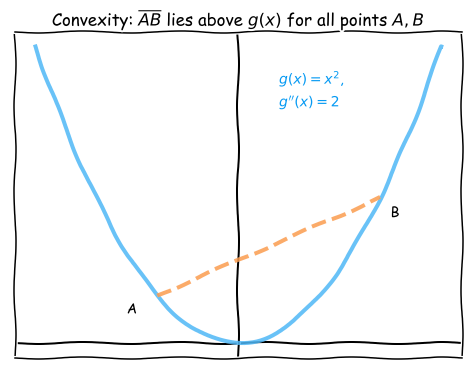

In [2]:
x = np.linspace(-10, 10, 1000)
y = x**2
x2 = [-4,7]
y2 = [16,49]

_, ax = plt.subplots(figsize=(8,6))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

ax.set_xticks([])
ax.set_yticks([])

plt.text(2.0, 80.0, '$g(x)=x^2$,\n$g^{\prime\prime}(x)=2$', color='xkcd:azure')
plt.text(-5.5, 10.0, 'A')
plt.text(7.5, 42.5, 'B')

ax.plot(x, y, 'xkcd:azure', lw=4, alpha=0.6)
ax.plot(x2,y2,'xkcd:orange', linestyle='--', lw=4, alpha=0.6)

ax.title.set_text('Convexity: $\overline{AB}$ lies above $g(x)$ for all points $A,B$')

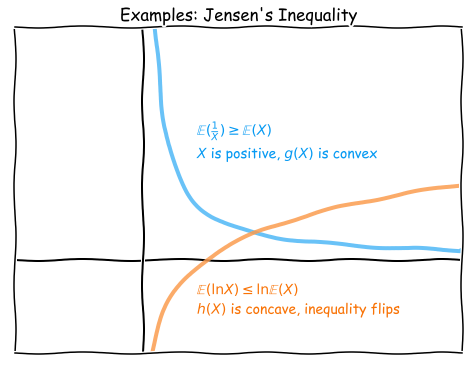

In [3]:
x = np.linspace(0.001, 5, 1000)
y = 1/x
x2 = np.linspace(0.001,5,1000)
y2 = np.log(x2)

_, ax = plt.subplots(figsize=(8,6))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim([-2,5])
ax.set_ylim([-2,5])
ax.text(0.85, 2.2, (r'$\mathbb{E}(\frac{1}{X}) \geq \mathbb{E}(X)$' '\n$X$ is positive, $g(X)$ is convex'), color='xkcd:azure')
ax.text(0.85, -1.2, '$\mathbb{E}(\ln X) \leq \ln \mathbb{E}(X)$\n$h(X)$ is concave, inequality flips', color='xkcd:orange')
ax.plot(x, y, 'xkcd:azure', lw=4, alpha=0.6)
ax.plot(x2, y2, 'xkcd:orange', lw=4, alpha=0.6)

ax.title.set_text("Examples: Jensen's Inequality")

#### Proof

We will try a graphical approach to prove Jensen's Inequality.

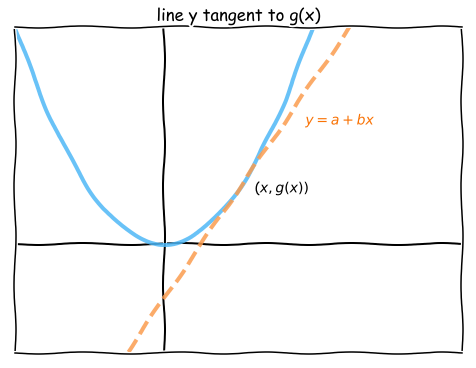

In [5]:
x = np.linspace(-10, 10, 1000)
y = x**2

f = 1 + 2*(x - 1)

_, ax = plt.subplots(figsize=(8,6))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

ax.text(1.9, 2.2, ('$y = a + bx$'), color='xkcd:orange')
ax.text(1.22, 0.95, ('($x, g(x))$'))

ax.set_xticks([])
ax.set_yticks([])
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim([-2,4])
ax.set_ylim([-2,4])
ax.plot(x, y, 'xkcd:azure', lw=4, alpha=0.6)
ax.plot(x, f, 'xkcd:orange', linestyle='--', lw=4, alpha=0.6)

ax.title.set_text("line y tangent to g(x)")

Referring to the geometric figure above...

\begin{align}
  g(x) &\geq a + bx &\quad g(x) \text{ lies above the tangent } y = a + bx \\  
  \Rightarrow g(X) &\geq a + bX &\quad \text{inequality applies to r.v. as well} \\
  \mathbb{E}\left( g(X) \right) &\geq \mathbb{E}\left( a + bX \right) &\quad \mathbb{E} \text{ as operator} \\\\
  \mathbb{E}\left( a + bX \right) &= a + b \, \mathbb{E}(X) \\
  &= a + b \, \mu &\quad \text{let } \mu = \mathbb{E}(X) \\ 
  &= g(\mu) \\
  &= g\left(\mathbb{E}(X)\right) \\\\
  \therefore \mathbb{E}\left( g(X) \right) &\geq g\left(\mathbb{E}(X)\right) &\quad \blacksquare
\end{align}

It is also possible to use Taylor expansions to prove Jensen's Inequality, but that is something for another time.

### (3) Markov's Inequality: $P(|X| \geq a) \leq \frac{\mathbb{E}|X|}{a}$ for any $a \gt 0$ 

The strength of Markov's Inequality is not in its accuracy of _approximation_, but rather in it simplicity and generality.

#### Proof

We will use the fundamental bridge to convert the probability of an event to the expected value of the indicator of said event.

\begin{align}
  I_{|X| \geq a} &\geq |X| &\quad \text{always true for } I_{|X| \geq a} = 0 \text{ or } I_{|X| \geq a} = 1 \\
  a \, \mathbb{E} \, I_{|X| \geq a} \geq \mathbb{E} \, |X| \\
  \mathbb{E} \, I_{|X| \geq a} \geq \frac{\mathbb{E} \, |X|}{a}
\end{align}

#### Intuition

Suppose that we have 100 people.

Q1: Is it possible that at least 95% of the people are younger than the mean age of the group?

A1: Yes, if one of those people is really, really old, then that person's age can raise the mean age above a large portion of group.

Q2: Is it possible that at least 50% of the people are older than *twice* the mean age?

A2: No, since that 50% will raise the mean age beyond that!

### (4) Chebyshev's Inequality: $P(|X-\mu| \leq \frac{Var(X)}{a^2}$ for $\mu = \mathbb{E}X, a \gt 0$

An alternate way of putting Chebyshev's Inequality is

\begin{align}
  P\left(|X-\mu| > c \, SD(X) \right) \leq \frac{1}{c^2} &\quad \text{for } c > 0 \\
\end{align}

Consider this: the probability that $X$ is more than 2 standard deviations from its mean is at most $\frac{1}{4}$. Recall the Normal distribution and the 68,95,98.7 percent rule? Compared to that rule, Chebyshev's Inequality provides a cruder but still correct relation.

#### Proof

\begin{align}
  P(|X-\mu| \ge a) &= P\left( (X-\mu)^2 \ge a^2 \right) \\
  &\leq \frac{\mathbb{E}(X-\mu)^2}{a^2} &\quad \text{by Markov's Inequality} \\
  &\leq \frac{Var(X)}{a^2} &\quad \blacksquare
\end{align}